### Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

### Definitionen der Ladungen und Felder, sowie der Art der Darstellung

In [2]:
# Raster
X,Y = np.meshgrid( np.arange(-4,4,.01), np.arange(-4,4,.01) )

# Vektorfeld einer Ladung
def q_field(q,x,y):
    """
    q: Ladung, 1 oder -1
    x,y: Position auf der x,y-Achse
    """
    # Definition des Feldes im Raster
    Ex = q/(4*np.pi)* (X+x)/((X+x)**2 + (Y+y)**2)**1.5
    Ey = q/(4*np.pi)* (Y+y)/((X+x)**2 + (Y+y)**2)**1.5
    
    return Ex, Ey, q, x, y

# Gesamtes Feld
def total_field(L):
    total_x = 0
    total_y = 0
    for field in L:
        e = 0
        while e <= 2:
            total_x += field[0]
            total_y += field[1]
            e += 1
    return total_x, total_y

# Zeige die Ladungen und das Feld
def vis(L):
    plt.style.use("default")
    plt.style.use("seaborn-dark")
    plt.style.use("grayscale")
    
    # Definiere das Gesamte Feld mit gegebener Ladungskonfiguration
    x_total = total_field(L)[0]
    y_total = total_field(L)[1]
    
    # Zeige das Feld
    fig = plt.figure(figsize=(7,7), dpi=300)
    fig.patch.set_facecolor('white')
    plt.xticks([])
    plt.yticks([])
    
    # Zeige die Ladungen
    white = (1,1,1,1)
    blue = (0.3, 0.5, 0.8,1)
    red = (1,0.5,0.5,1)
    for field in L:
        if field[2] < 0:
            plt.plot(-field[3], -field[4], "o", color=white, zorder=40, markersize=25)
            plt.plot(-field[3], -field[4], "o", color=blue, zorder=60, markersize=10)
        else:
            plt.plot(-field[3], -field[4], "o", color=white, zorder=40, markersize=25)
            plt.plot(-field[3], -field[4], "o", color=red, zorder=60, markersize=10)
    
    # Plotte alles zu zeigende
    plt.streamplot(X,Y,x_total,y_total, color = (0,0,0,1), cmap="inferno",
              density=1.5, linewidth=1)

# LADUNGSKONFIGURATION
### Füge beliebig Ladungen an den gewünschten Orten hinzu:

In [9]:
# Ladungskonfiguration
L = [q_field(-1,1.4,0.2),
     q_field(1,-3,0.7),
     q_field(-1,-1.4,-2.1),
     q_field(1,3.6,-3)]

### Zeige das Feld mit den Ladungen

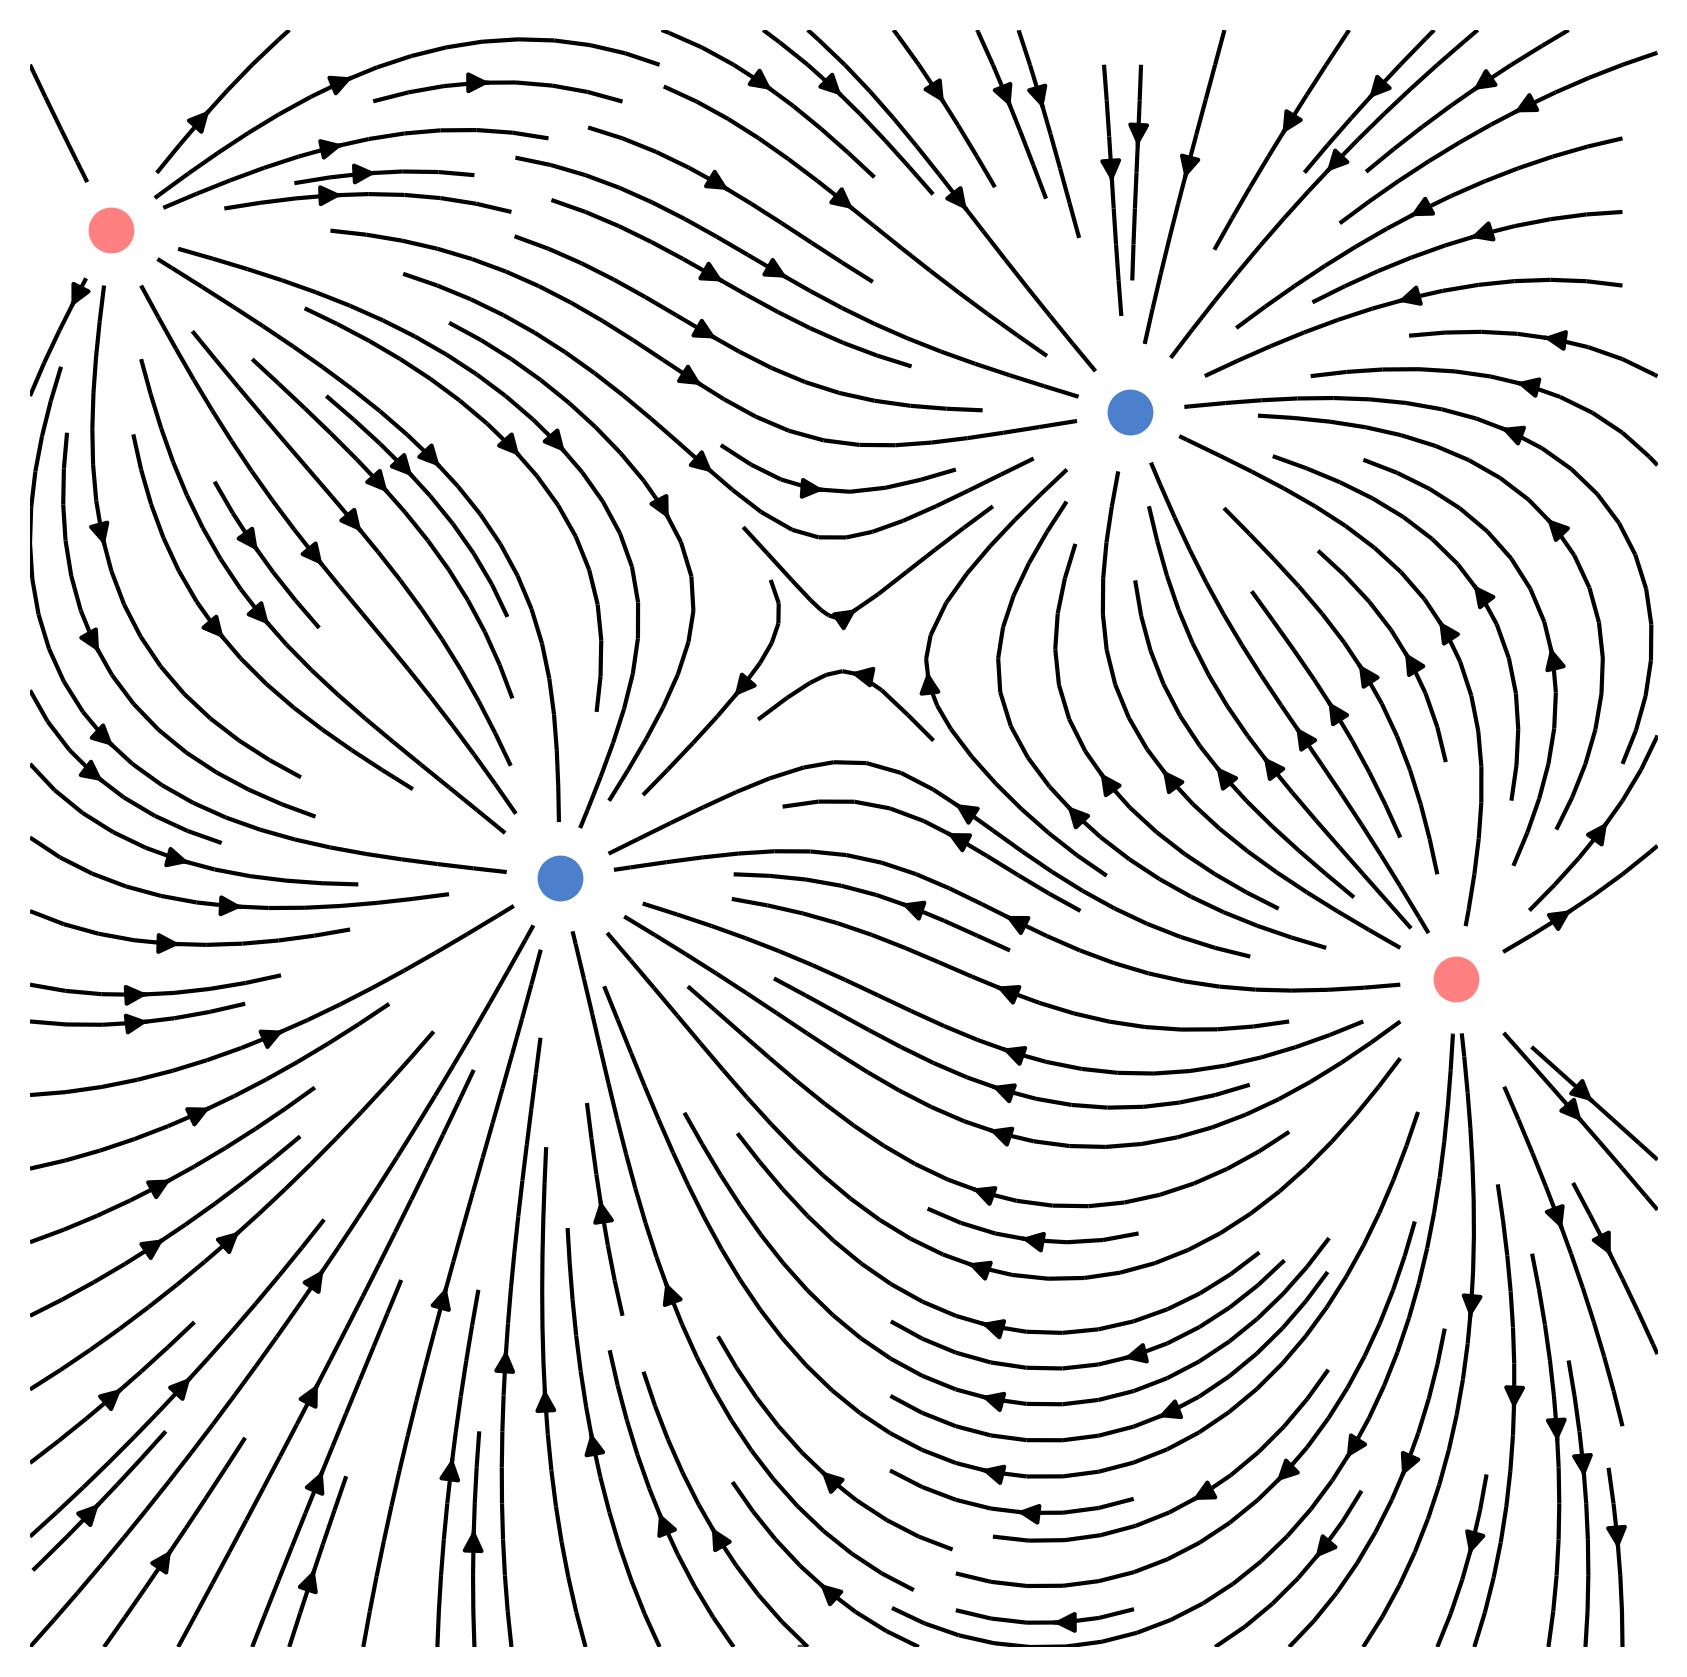

In [10]:
vis(L)

---
## Weitere Felder:

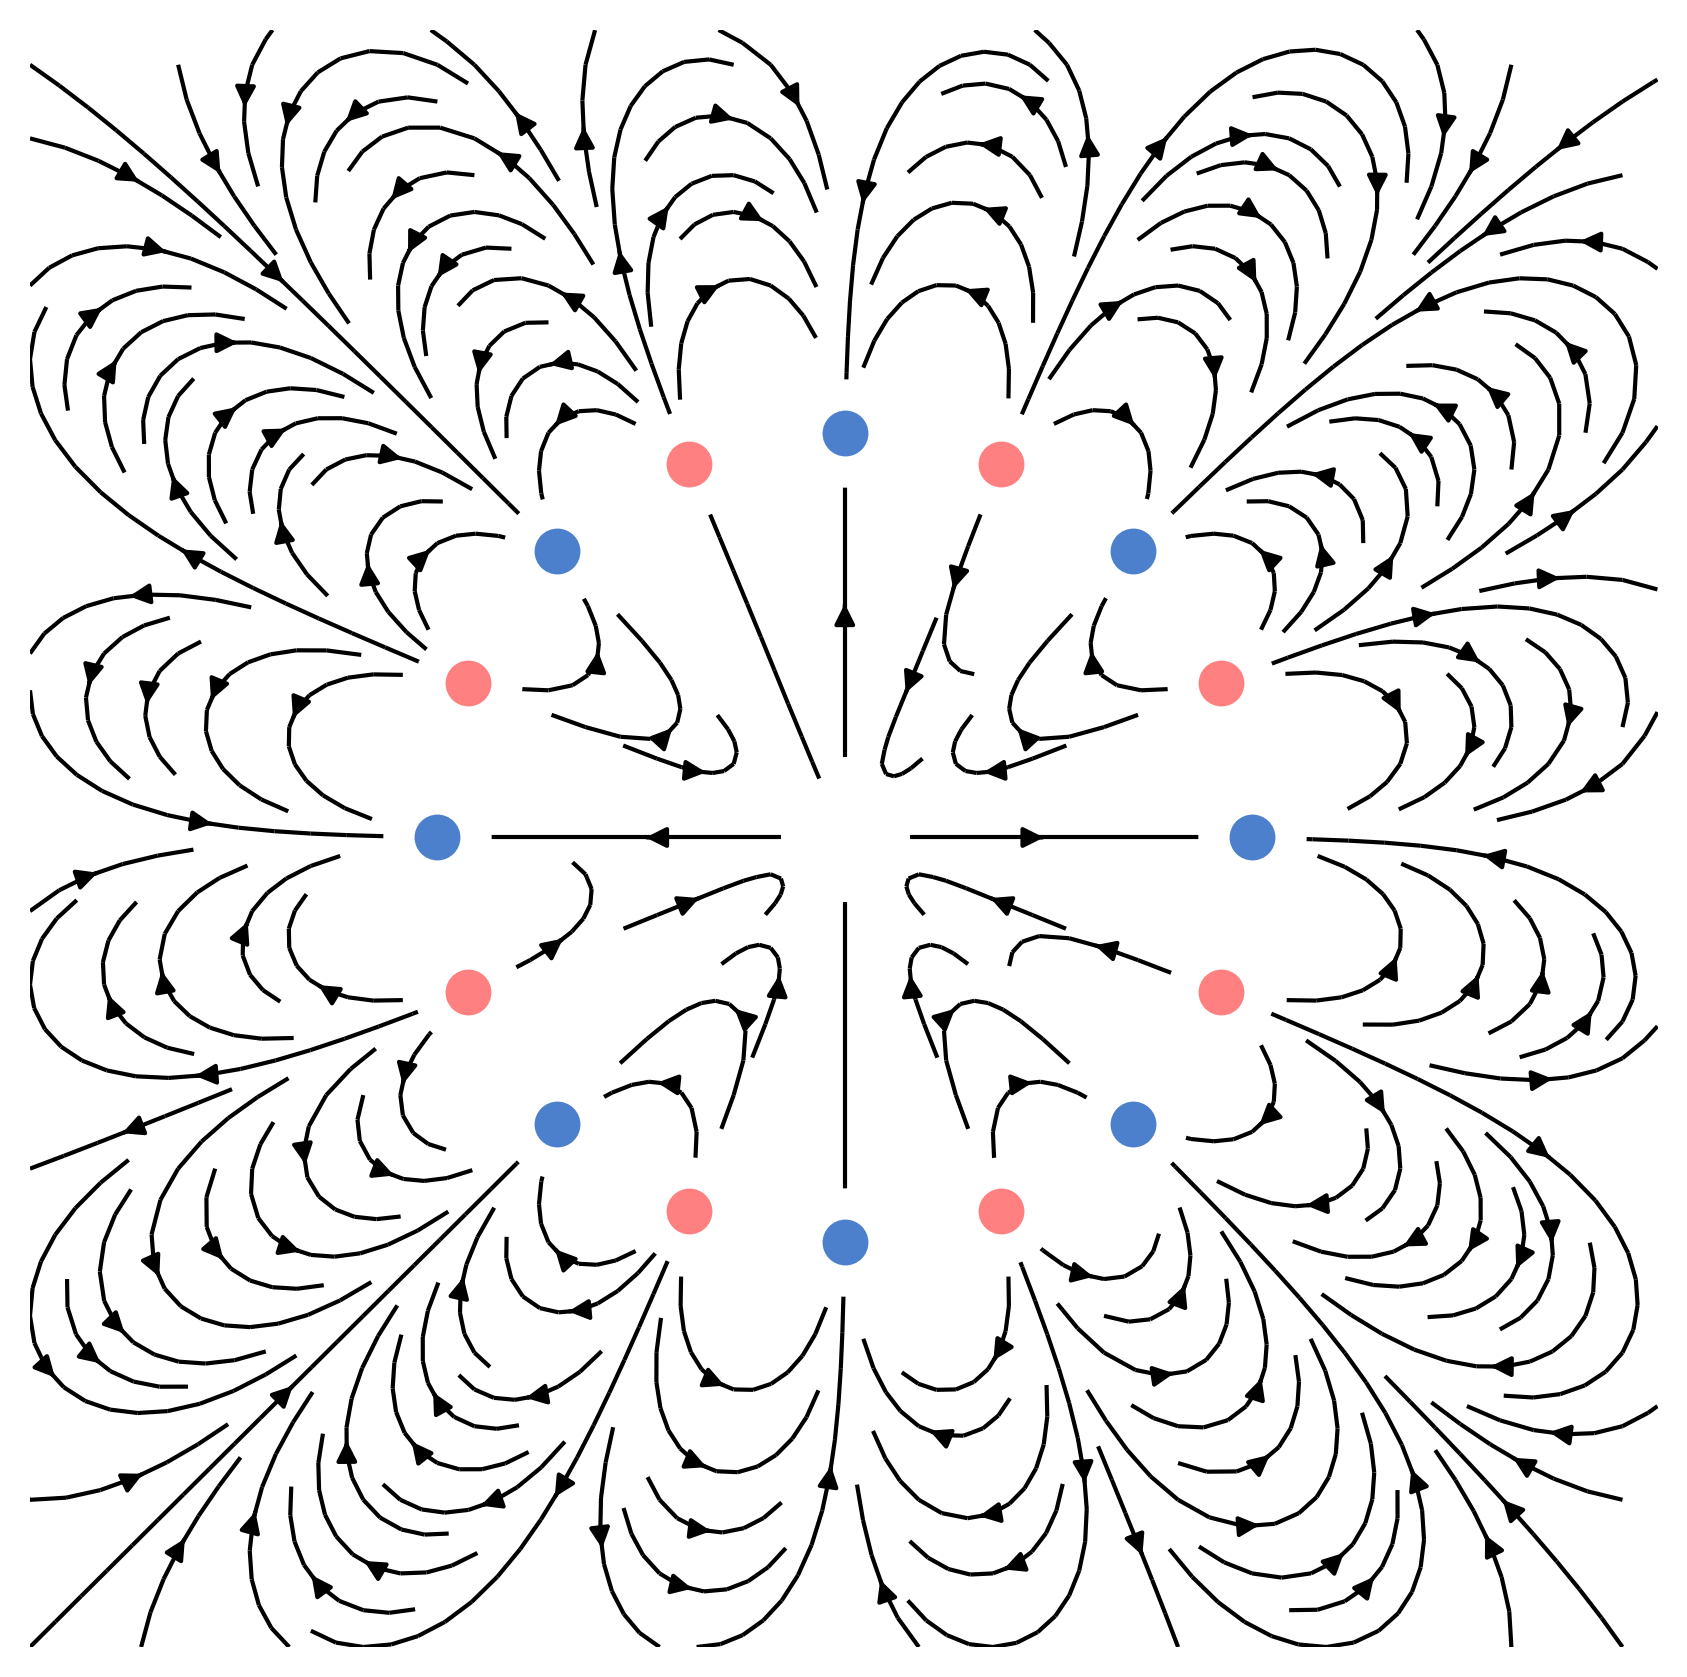

In [5]:
Pnum = 16
L = []
for n in range(Pnum):
    if n % 2:
        la = 1
    else:
        la = -1
    L.append(q_field(la, 2 * np.cos(2*np.pi*n/Pnum),2 *  np.sin(2*np.pi * n / Pnum)))
    
vis(L)
plt.plot(0, 0, "o", color="white", zorder=40, markersize=30)

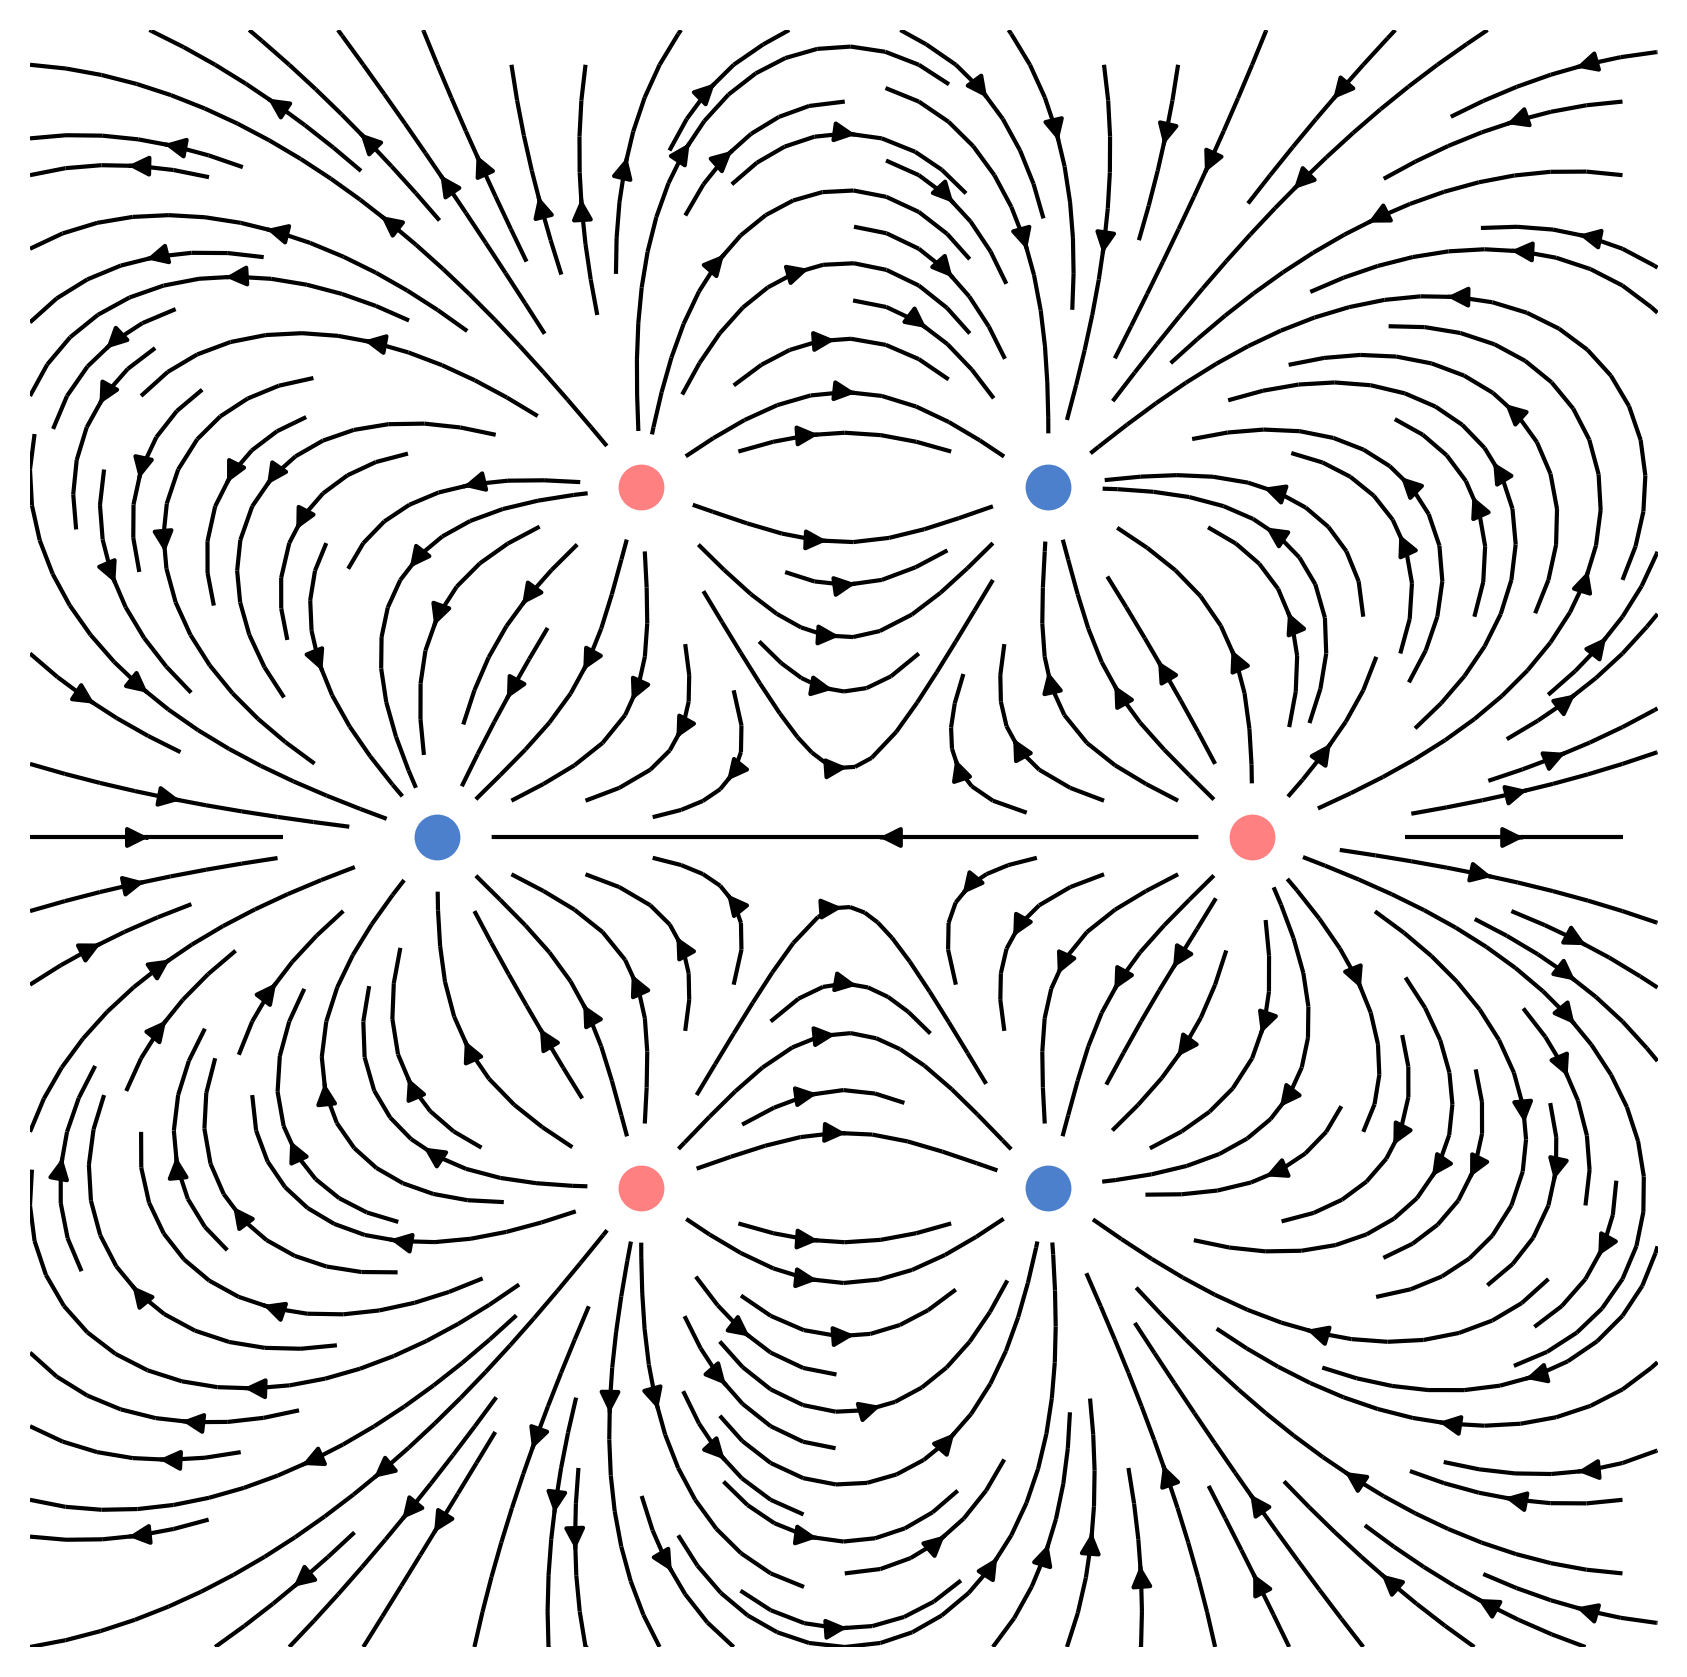

In [19]:
Pnum = 6
L = []
for n in range(Pnum):
    if n % 2:
        la = 1
    else:
        la = -1
    L.append(q_field(la, 2 * np.cos(2*np.pi*n/Pnum),2 *  np.sin(2*np.pi * n / Pnum)))
    
vis(L)
#plt.plot(0, 0, "o", color="white", zorder=40, markersize=185)